## Objective
The objective is to build a classification model which can predict whether an account is becoming a Bad Debt. This prediction can help to forecast the number (and value) of accounts that are at risk of developing into a Bad Debt.


### Evaluation Criteria: Mean Precision Score

Mean of precision of all the classes = (P1+P2)/2  Here P1 is Precision of  Class 1 and P2 is Precision of Class2.


## Data Input:

There are two files:-
* account_train.csv - for training the model
* account_test.csv - for prediction and submission


## Data Dictionary:

* AccID: An unique id for the account
* CategoryID: An unique id for the category of the society
* Category: Category of society 
* Value: The market value of the particular property (account)
* PropertySize: The size of the property in square meters
* BillingAmt: The total amount payable by the resident to the society management
* AverageBillingAmt: The average amount payable by the resident to the society management
* CollectedAmt: The total amount collected from the resident 
* AverageCollectedAmt: The average amount collected from the resident 
* DebtAmt: The Total Debt that is at 90 days or more
* WriteOffAmt: The Total amount of debt that has been written off
* CollectionRatio: The ratio between the Total amount collected and Total Billing (ie. CollectedAmt/ BillingAmt)
* DebtBillingRatio: The ratio between the Total Debt and Total Billing (ie. (Total Debt + Total Write Off)/Total Billing)
* TotalElectricityBill: The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.
* HasID: The resident has an ID number. 
*  Label: 1 = Is considered to be a Bad Debt, 0 = Not considered to be a Bad Debt

## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 

### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn

In [1]:
# this will help in making the Python code more structured automatically
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


In [2]:
#TRAIN_DATA_URL = "https://raw.githubusercontent.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-june21-balanzer/main/src/projects/Hackathons/account_train_(1).csv?token=AFY32NURJVAI4HT37LK32QLBOJWUO"

#TEST_DATA_URL = "https://raw.githubusercontent.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-june21-balanzer/main/src/projects/Hackathons/account_test_(1).csv?token=AFY32NS2VSEOV3ZM4ESFKWTBOJWV2"
# reading  data given from bank and load to data frame
#debt = pd.read_csv(TRAIN_DATA_URL)
#debt_test = pd.read_csv(TEST_DATA_URL)
#debt = pd.read_csv("account_train_(1).csv")

debt_orig = pd.read_csv("account_train_(1).csv")
debt_test_orig = pd.read_csv("account_test_(1).csv")

""""
from google.colab import files
uploaded = files.upload()


import io
debt = pd.read_csv(io.BytesIO(uploaded['account_train_(1).csv']))
debt_test = pd.read_csv(io.BytesIO(uploaded['account_test_(1).csv']))
"""

# copying orignal data so that when changing data we dont lose original
#data = debt.sample(100).copy()
#data_validation = debt_test.sample(100).copy()




'"\nfrom google.colab import files\nuploaded = files.upload()\n\n\nimport io\ndebt = pd.read_csv(io.BytesIO(uploaded[\'account_train_(1).csv\']))\ndebt_test = pd.read_csv(io.BytesIO(uploaded[\'account_test_(1).csv\']))\n'

In [3]:
## data copy 

debt = debt_orig.head(100).copy()
#debt_test = debt_test_orig.head(100).copy()
debt_test = debt_orig.drop("Label",axis=1).head(100).copy()


# copying orignal data so that when changing data we dont lose original
data = debt.sample(100).copy()
data_validation = debt_test.sample(100).copy()

In [4]:
print(f'data(train) shape after reading csv :  {data.shape}')
print(f'data_validation(test) shape after reading csv :  {data_validation.shape}')

data(train) shape after reading csv :  (100, 16)
data_validation(test) shape after reading csv :  (100, 15)


In [5]:
data.head(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
87,6d7359c8-f43b-4149-9087-730e53b2bd1d,6,Government,280000,1165,0,0,0,0,0,0,0.00,0.00,0,0,0
43,c6dfe03c-4a2f-4d9d-a8c9-37512f0b1310,1,Residential,910000,706,3093,258,1300,163,0,0,0.42,0.00,1866,1,0
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
42,e6582308-8889-4cfe-8989-026b198211f2,1,Residential,17880,0,5503,115,0,0,20643,0,0.00,3.75,703,1,1
95,1a7d99d9-f7b8-4c6a-955c-5c3dcfb420d9,11,Unknown,0,0,35,3,0,0,2341,0,0.00,67.02,0,0,1


In [6]:
data_validation.tail(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
27,c9f657bb-7e54-4ea8-863a-0bddb0ca8ca1,1,Residential,1295000,1123,26528,246,28600,3178,7149,0,1.08,0.27,11151,1
14,a1a81ae2-902e-4474-b136-31b79b5438de,1,Residential,35000,300,3641,98,0,0,19080,0,0.00,5.24,0,1
36,8b866cac-39ad-4369-b27b-628394842bc7,11,Unknown,0,0,-4311,-1437,0,0,4311,0,0.00,-1.00,0,1
6,5b47579d-a965-415b-8eac-1565dd327839,2,Business,50000,1915,953,73,953,191,0,0,1.00,0.00,0,0
53,202cb612-360d-408f-9dc2-6d1d16c414a3,1,Residential,160000,563,8309,170,8732,1746,54,0,1.05,0.01,3132,1


In [7]:
data.shape

(100, 16)

In [8]:
data_validation.shape

(100, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 87 to 86
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccID                 100 non-null    object 
 1   CategoryID            100 non-null    int64  
 2   Category              100 non-null    object 
 3   Value                 100 non-null    int64  
 4   PropertySize          100 non-null    int64  
 5   BillingAmt            100 non-null    int64  
 6   AverageBillingAmt     100 non-null    int64  
 7   CollectedAmt          100 non-null    int64  
 8   AverageCollectedAmt   100 non-null    int64  
 9   DebtAmt               100 non-null    int64  
 10  WriteOffAmt           100 non-null    int64  
 11  CollectionRatio       100 non-null    float64
 12  DebtBillingRatio      100 non-null    float64
 13  TotalElectricityBill  100 non-null    int64  
 14  HasID                 100 non-null    int64  
 15  Label                 1

In [10]:
data_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 85 to 53
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccID                 100 non-null    object 
 1   CategoryID            100 non-null    int64  
 2   Category              100 non-null    object 
 3   Value                 100 non-null    int64  
 4   PropertySize          100 non-null    int64  
 5   BillingAmt            100 non-null    int64  
 6   AverageBillingAmt     100 non-null    int64  
 7   CollectedAmt          100 non-null    int64  
 8   AverageCollectedAmt   100 non-null    int64  
 9   DebtAmt               100 non-null    int64  
 10  WriteOffAmt           100 non-null    int64  
 11  CollectionRatio       100 non-null    float64
 12  DebtBillingRatio      100 non-null    float64
 13  TotalElectricityBill  100 non-null    int64  
 14  HasID                 100 non-null    int64  
dtypes: float64(2), int64(11

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100.0,2.420000e+00,2.785895e+00,1.00,1.00,1.00,2.0000,1.100000e+01
Value,100.0,8.962371e+05,3.718357e+06,0.00,34375.00,116000.00,778500.0000,3.682500e+07
PropertySize,100.0,2.177510e+06,2.158163e+07,0.00,290.75,670.50,1963.0000,2.158329e+08
BillingAmt,100.0,7.310600e+03,2.990529e+04,-244122.00,320.75,4536.50,10549.2500,9.506200e+04
AverageBillingAmt,100.0,3.224900e+02,1.112248e+03,-3014.00,29.75,121.50,335.2500,8.736000e+03
CollectedAmt,100.0,9.450990e+03,1.513997e+04,0.00,0.00,483.50,12061.2500,5.598100e+04
AverageCollectedAmt,100.0,1.953770e+03,6.479275e+03,0.00,0.00,177.00,930.5000,5.495600e+04
DebtAmt,100.0,1.307762e+04,5.491048e+04,0.00,0.00,0.00,2884.5000,4.232240e+05
WriteOffAmt,100.0,9.242400e+02,8.372270e+03,0.00,0.00,0.00,0.0000,8.370200e+04
CollectionRatio,100.0,-5.539000e-01,1.222405e+01,-121.26,0.00,0.83,1.0100,5.610000e+00


In [12]:
data_validation.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100.0,2.420000e+00,2.785895e+00,1.00,1.00,1.00,2.0000,1.100000e+01
Value,100.0,8.962371e+05,3.718357e+06,0.00,34375.00,116000.00,778500.0000,3.682500e+07
PropertySize,100.0,2.177510e+06,2.158163e+07,0.00,290.75,670.50,1963.0000,2.158329e+08
BillingAmt,100.0,7.310600e+03,2.990529e+04,-244122.00,320.75,4536.50,10549.2500,9.506200e+04
AverageBillingAmt,100.0,3.224900e+02,1.112248e+03,-3014.00,29.75,121.50,335.2500,8.736000e+03
CollectedAmt,100.0,9.450990e+03,1.513997e+04,0.00,0.00,483.50,12061.2500,5.598100e+04
AverageCollectedAmt,100.0,1.953770e+03,6.479275e+03,0.00,0.00,177.00,930.5000,5.495600e+04
DebtAmt,100.0,1.307762e+04,5.491048e+04,0.00,0.00,0.00,2884.5000,4.232240e+05
WriteOffAmt,100.0,9.242400e+02,8.372270e+03,0.00,0.00,0.00,0.0000,8.370200e+04
CollectionRatio,100.0,-5.539000e-01,1.222405e+01,-121.26,0.00,0.83,1.0100,5.610000e+00


In [13]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )

print_null_info(data)


,missing count,missing %


In [14]:
print_null_info(data_validation)

,missing count,missing %


In [15]:
# check for any duplciate data
data[data.duplicated()].shape

(0, 16)

In [16]:
## Replace NAN with median values 

# counting the number of missing values per row

num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()


0    100
dtype: int64

In [17]:
#data[num_missing == 2].sample(n=15)

In [18]:
#data[num_missing == 1].sample(n=15)

In [19]:
#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
            print()
            print(f"Column name : ({col}), Column Data Type : ({df[col].dtypes}) and has total : ({df[col].nunique()}) unique values")
            print()
            print(f"Top 10 Unique Values & Value counts ")
            print()
            print(df[col].value_counts()[0:10])
            print()
            print("-" * 50)


In [20]:
# print value types and value counts

cols = ["AccID", "CategoryID", "Category", "HasID"]

print_category_value_counts(data, cols)




Column name : (AccID), Column Data Type : (object) and has total : (100) unique values

Top 10 Unique Values & Value counts 

2ce144d4-2889-4ba8-ac7f-0a8286b2d5b8    1
8ce96199-a1ad-4f50-a1c2-5323064b2272    1
1c53c861-e605-47f7-b854-c616a4d4fa04    1
29eed6fe-2ea7-4b76-9ae7-81679ca9bc74    1
d9088e21-564d-4fbd-afb7-bf2560a8c0cb    1
bc9e9be5-fdf4-4fe7-90b9-fe631bffbd0e    1
b9d188dc-3d08-4683-9ebb-6962a4515f67    1
4f909ad4-e163-4c09-b6ad-2c4a807f9899    1
7417b04d-4382-4601-9229-ad6b8dcab5b7    1
c6dfe03c-4a2f-4d9d-a8c9-37512f0b1310    1
Name: AccID, dtype: int64

--------------------------------------------------

Column name : (CategoryID), Column Data Type : (int64) and has total : (7) unique values

Top 10 Unique Values & Value counts 

1     68
4     10
2      8
11     7
5      3
6      3
8      1
Name: CategoryID, dtype: int64

--------------------------------------------------

Column name : (Category), Column Data Type : (object) and has total : (7) unique values

Top 10 Un

In [21]:
print_category_value_counts(data_validation, cols)



Column name : (AccID), Column Data Type : (object) and has total : (100) unique values

Top 10 Unique Values & Value counts 

2ce144d4-2889-4ba8-ac7f-0a8286b2d5b8    1
8ce96199-a1ad-4f50-a1c2-5323064b2272    1
1c53c861-e605-47f7-b854-c616a4d4fa04    1
29eed6fe-2ea7-4b76-9ae7-81679ca9bc74    1
ae79949a-4593-4399-ae21-aab5191d0b51    1
bc9e9be5-fdf4-4fe7-90b9-fe631bffbd0e    1
b9d188dc-3d08-4683-9ebb-6962a4515f67    1
4f909ad4-e163-4c09-b6ad-2c4a807f9899    1
7417b04d-4382-4601-9229-ad6b8dcab5b7    1
c6dfe03c-4a2f-4d9d-a8c9-37512f0b1310    1
Name: AccID, dtype: int64

--------------------------------------------------

Column name : (CategoryID), Column Data Type : (int64) and has total : (7) unique values

Top 10 Unique Values & Value counts 

1     68
4     10
2      8
11     7
5      3
6      3
8      1
Name: CategoryID, dtype: int64

--------------------------------------------------

Column name : (Category), Column Data Type : (object) and has total : (7) unique values

Top 10 Un

In [22]:
# Drop CategoryID, AccID Columns - we can use Category in future
#data.drop(["CategoryID", "AccID"], axis=1, inplace=True)
#data_validation.drop(["CategoryID", "AccID"], axis=1, inplace=True)

# Exploratory Data **Analysis**

In [23]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=25)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

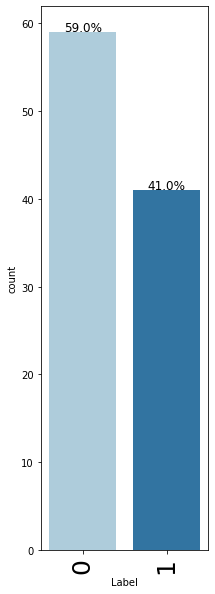

In [24]:
labeled_barplot(data=data, feature="Label", perc=True)



## Identify Correlation in data 

lets check how the target feature related with other features and relationship between features

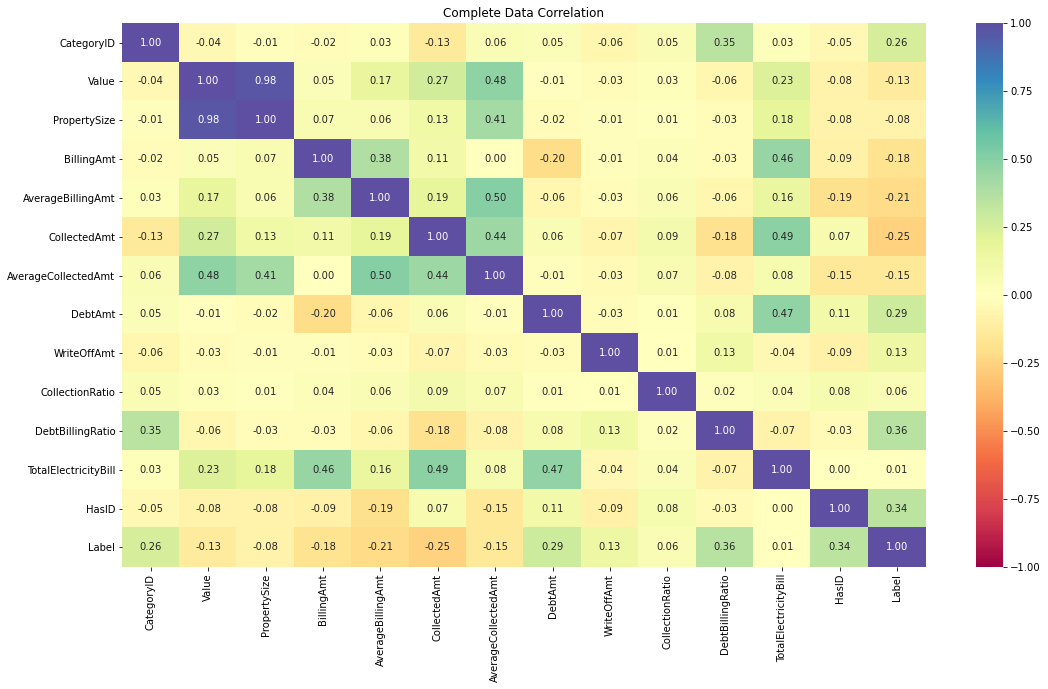

In [25]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()

X shape before one hot encoding (100, 12)
XV shape before one hot encoding (100, 12)


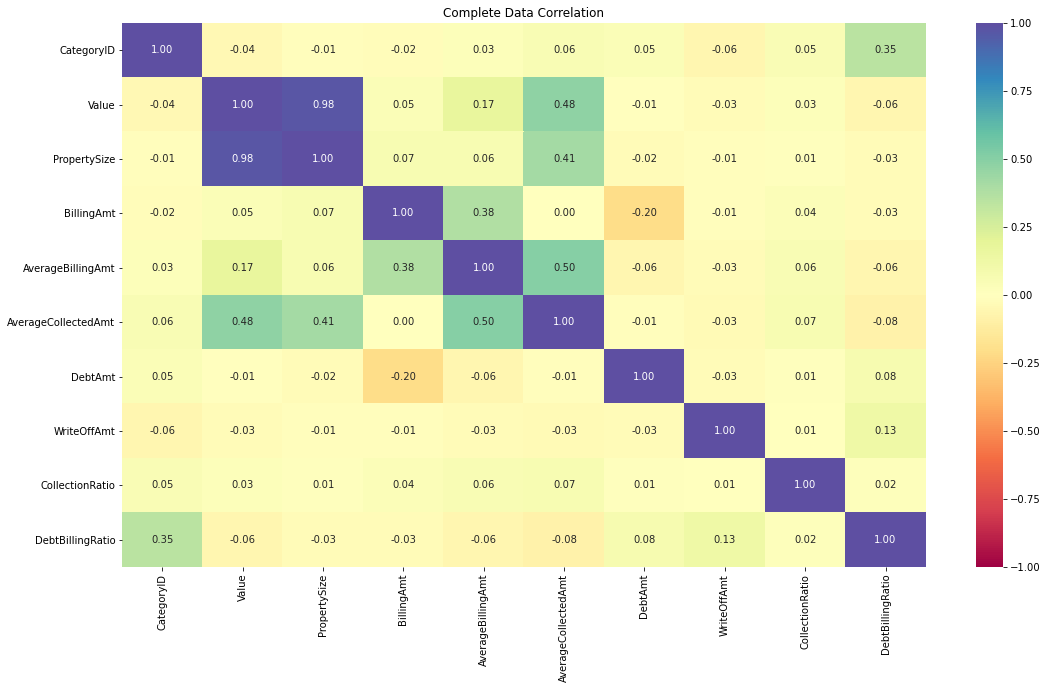

In [26]:
"""
X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()
"""
"""
X = data.drop(["Label","HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
"""

X = data.drop(["Label","HasID","TotalElectricityBill","CollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","TotalElectricityBill","CollectedAmt"], axis=1)

"""
X = data.drop(["Label","TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
"""


print(f'X shape before one hot encoding {X.shape}')
print(f'XV shape before one hot encoding {XV.shape}')


plt.figure(figsize=(18, 10))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()


In [27]:

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
XV = pd.get_dummies(XV, drop_first=True)
print(f'X shape after one hot encoding {X.shape}')
print(f'XV shape after one hot encoding {XV.shape}')

X shape after one hot encoding (100, 115)
XV shape after one hot encoding (100, 115)


In [28]:
# import train_test_split library

from sklearn.model_selection import train_test_split

In [29]:
# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)

print()


Number of rows in train data = 70
Number of rows in test data = 30

Percentage of classes in training set
0    55.714286
1    44.285714
Name: Label, dtype: float64

Percentage of classes in test set
0    66.666667
1    33.333333
Name: Label, dtype: float64



In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    print(f"Model '{name}' performance \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Test",
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf


In [31]:
def confusion_matrix_classification(name, model):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test
    predictors_output = X_test.copy()

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    predictors_output['Orig'] = target_test
    predictors_output['Model'] = y_pred_test

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True label", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True label", ylabel="Predicted label", title="Test Data")


    ret_elements = predictors_output[predictors_output["Orig"] != predictors_output["Model"]];
    return ret_elements



# Model building

In [32]:
# import libraries
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To build model for prediction
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### Creating Functions to create output files

In [33]:
## Generate Validation output 

def create_validation_output(model,output_file_name):
    print(f"generate output size : {XV.shape}")
    print()
    debt_test1 = debt_test.copy()
    debt_test1['Label'] = model.predict(XV)
    debt_test1[["AccID","Label"]].to_csv('output/'+output_file_name,index=False)
    #from google.colab import files
    #files.download(output_file_name)
    print( debt_test1['Label'].value_counts(normalize=True) * 100)
    print()
    

In [34]:
modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1)
modelDM1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [35]:
dec_tree_model_perf = model_performance_classification("Default Decision Tree Classifier", modelDM1)
dec_tree_model_perf

Model 'Default Decision Tree Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Decision Tree Classifier,Training,100.0,100.0,100.0,100.0,100.0
1,Default Decision Tree Classifier,Test,100.0,100.0,100.0,100.0,100.0


Model 'Default Decision Tree Classifier' confusion matrix 




,CategoryID,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,AccID_0be33765-977c-4cc5-952d-22c79bf15885,AccID_0dcd58f2-e378-4693-9983-2c8d323c14d1,AccID_1713ba39-b275-4966-9a50-dfef7989ac0c,AccID_1a7d99d9-f7b8-4c6a-955c-5c3dcfb420d9,AccID_1c3c8691-d001-4096-81cf-a6f7b6cc9ad5,AccID_1c53c861-e605-47f7-b854-c616a4d4fa04,AccID_1e0363e4-2029-4b62-a9ec-d909cee000cb,AccID_1e2e1ad6-d9d9-4f04-b078-0f638934eb7f,AccID_202cb612-360d-408f-9dc2-6d1d16c414a3,AccID_2519ff14-cba8-4a6f-b4ec-6cdff029e4eb,AccID_2829148f-d9bb-42f1-912a-667dbea68905,AccID_29eed6fe-2ea7-4b76-9ae7-81679ca9bc74,AccID_2cb03547-3071-4588-a939-ed5a56fe3d9a,AccID_2ce144d4-2889-4ba8-ac7f-0a8286b2d5b8,AccID_2f05be78-29eb-4789-8073-3a7cfafbca32,AccID_316a00e6-3afe-449a-8284-3249f45f1adf,AccID_3acdcf91-840d-436b-ae85-9ba45a61e8be,AccID_40536c2d-c0a2-4486-b0aa-60b36dfa290a,AccID_4627404e-694a-4f94-b600-98f32a4b0a49,AccID_4720b209-7cb8-46af-9b74-879f21280053,AccID_4b781bbe-6833-485c-9d2d-13f02a4c0982,AccID_4cfc1ad0-5d41-4bad-a7bd-e377e0e59147,AccID_4f0f480f-79ee-4ebf-9a8d-5f79b19f828f,AccID_4f909ad4-e163-4c09-b6ad-2c4a807f9899,AccID_52918596-7cfb-43fb-a1d8-92f149dfdf91,AccID_52a2254d-44e5-4dc9-8e08-1b135096172c,AccID_532e1d1c-60e4-49cf-a36b-40e4683920b6,AccID_558849fd-916e-4c70-a45b-345c7625a05a,AccID_5a180005-96d7-4ae7-ae0c-efe00731cf66,AccID_5b47579d-a965-415b-8eac-1565dd327839,AccID_5e1bf25f-aaa9-44cf-b80d-94afd426cd42,AccID_612a1712-fdfa-48f7-a12c-12fc58972e8a,AccID_613516cf-f200-455e-9d7a-4892d82a0f7a,AccID_623a8f9a-77c9-4937-b4bf-0e83884c34df,AccID_634301de-76a4-4b02-a352-f2b16b070d1d,AccID_64cba6dd-0a1e-490e-a0d1-a412a2e4967d,AccID_65cbf79d-d24a-4a61-8b18-a1815d501bec,AccID_675a463b-2c11-4be8-9b76-09b0622bf8ed,AccID_6876252d-4e1e-4458-9794-db445282d226,AccID_6d0f2bbe-3971-427d-b185-05b43485a3af,AccID_6d7359c8-f43b-4149-9087-730e53b2bd1d,AccID_7350b72f-a310-4d6f-b48f-d1369538be9d,AccID_7417b04d-4382-4601-9229-ad6b8dcab5b7,AccID_7418446a-555f-4ae2-8a6f-acad011769eb,AccID_746153fe-b73e-4a19-8b8a-808f17e11341,AccID_80707e33-72d5-49fd-a415-0818a2d44e04,AccID_84a8ffd4-83be-4406-98e1-592759400fe1,AccID_85e7f06a-790a-4a2d-90c7-30eb79f275f9,AccID_8907e763-7949-4a26-b1e6-193d7b6b49e3,AccID_8b866cac-39ad-4369-b27b-628394842bc7,AccID_8ce96199-a1ad-4f50-a1c2-5323064b2272,AccID_91cebaca-6bf1-40ac-a3d5-212763802b0f,AccID_95cd5bc4-0e2d-42cc-8d86-60331deb6a08,AccID_95daa45d-3dfd-4c60-aae4-05e78b0de26e,AccID_98e3e35e-2f26-4c2e-aac6-c3c1961d036a,AccID_9afa5f6c-cd1f-4dba-85a1-ced90f9a7e9b,AccID_9d2e4a58-15a7-4c67-9422-793ebad155f6,AccID_a1a81ae2-902e-4474-b136-31b79b5438de,AccID_ad9ade4f-9ac3-41d7-b10e-dfc9cf76b491,AccID_ae78cc6b-8222-47a6-abb5-f962a9ac9787,AccID_ae79949a-4593-4399-ae21-aab5191d0b51,AccID_b0e16d8e-21a5-4b19-92c7-3f2143cb81f8,AccID_b144e5ab-e280-4bcc-a9d9-cd29ffcf0919,AccID_b8e3fb51-f821-4460-9ecc-1cb95c6191f3,AccID_b95029b5-3c6c-4281-9344-1317f07a6c2d,AccID_b9d188dc-3d08-4683-9ebb-6962a4515f67,AccID_bc9e9be5-fdf4-4fe7-90b9-fe631bffbd0e,AccID_bdf8b545-7050-4a5d-aaf7-ecb777857dfd,AccID_c160c61b-bc29-4aca-a7d1-aa267b7dd49c,AccID_c1d11e87-7c74-433a-9aaa-e1cf1d74e7d9,AccID_c3d173de-7b04-438d-ac99-81d13e7070a7,AccID_c6dfe03c-4a2f-4d9d-a8c9-37512f0b1310,AccID_c7c4076d-9222-4cff-88a2-a620f92ba7fc,AccID_c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,AccID_c9f657bb-7e54-4ea8-863a-0bddb0ca8ca1,AccID_ce4007d8-b1f1-48b7-a5b7-1d2801bb3171,AccID_cf3f598a-e88f-4380-abe1-05b49242d197,AccID_cf661499-f93c-47f2-9e2d-760b7eaf106b,AccID_d1a3216e-b7fc-4d2a-b92a-8600d7cefaa2,AccID_d4dc5e29-1d4c-42ad-bf35-172d42a39b62,AccID_d6aa16ba-e9d3-43f4-acbc-2826b717fbc3,AccID_d88ba925-12d2-45aa-98f6-108edaf3cc76,AccID_d895ca2e-1689-4657-9585-07e0a653c11c,AccID_d9088e21-564d-4fbd-afb7-bf2560a8c0cb,AccID_da71d8cc-f281-4ba2-86f7-041c9b3fd676,AccID_deb1da75-fd5e-40fd-9b85-a0c93ddf1b51,AccID_e2e059ce-f835-4e50-a886-7939d204608c,AccID_e31dee63-7cff-423d-95c3-c65d42e51f32,AccID_e5f86e60-725c-4c47-a21f-7b7a95de5ed1,AccID_e6582308-8889-4cfe-8989-026b198211

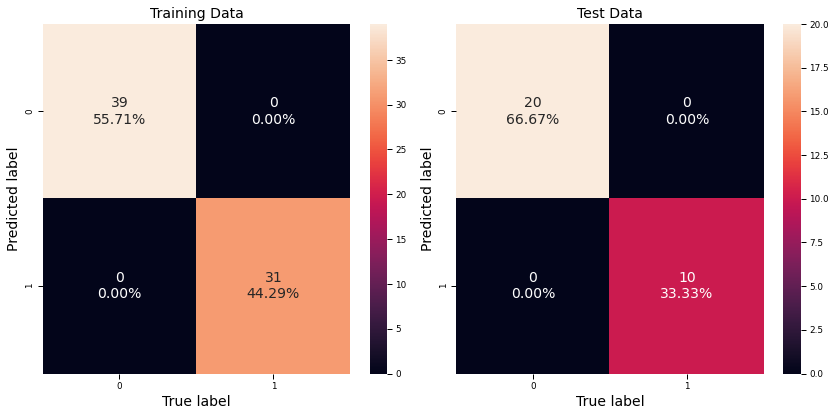

In [36]:
confusion_matrix_classification("Default Decision Tree Classifier", modelDM1)

In [37]:
#generate output
create_validation_output(modelDM1,'default_tree_output.csv')

generate output size : (100, 115)

0    59.0
1    41.0
Name: Label, dtype: float64

